In [1]:
import pandas as pd

def load_data(path):
    # Pulizia generale
    df = pd.read_csv(path)
    df = df.drop(["Utilities"], axis=1)
    df.Alley = df.Alley.fillna("No alley access")
    df.LotFrontage = df.LotFrontage.fillna(round(df.LotFrontage.mean(),1))
    df.Exterior1st = df.Exterior1st.fillna("Other")
    df.Exterior2nd = df.Exterior2nd.fillna("Other")
    df.MasVnrType = df.MasVnrType.fillna("None")
    df.MasVnrArea = df.MasVnrArea.fillna(round(df.MasVnrArea.mean(),1))
    df.MSZoning = df.MSZoning.fillna("No info")
    df.BsmtQual = df.BsmtQual.fillna("No Basement") 
    df.BsmtCond = df.BsmtCond.fillna("No Basement")
    df.BsmtExposure = df.BsmtExposure.fillna("No Basement")
    df.BsmtFinType1 = df.BsmtFinType1.fillna("No Basement")
    df.BsmtFinType2 = df.BsmtFinType2.fillna("No Basement")
    df.BsmtFinSF1 = df.BsmtFinSF1.fillna(round(df.BsmtFinSF1.mean(),1))
    df.BsmtFinSF2 = df.BsmtFinSF2.fillna(round(df.BsmtFinSF2.mean(),1))
    df.BsmtUnfSF = df.BsmtUnfSF.fillna(round(df.BsmtUnfSF.mean(),1))
    df.TotalBsmtSF = df.TotalBsmtSF.fillna(round(df.TotalBsmtSF.mean(),1))
    df.BsmtFullBath = df.BsmtFullBath.fillna(1)
    df.BsmtHalfBath = df.BsmtHalfBath.fillna(0)
    df.KitchenQual = df.KitchenQual.fillna("TA")
    df.Functional = df.Functional.fillna("Typ")
    df.Fireplaces = df.Fireplaces.fillna(0)
    df.FireplaceQu= df.FireplaceQu.fillna("No Fireplace")
    df.GarageArea = df.GarageArea.fillna(round(df.GarageArea.mean(),1))
    df.GarageType = df.GarageType.fillna("No garage")
    df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.mean())
    df.GarageFinish = df.GarageFinish.fillna("No garage")
    df.GarageCars = df.GarageCars.fillna(2)
    df.GarageQual = df.GarageQual.fillna("No garage")
    df.GarageCond = df.GarageCond.fillna("No garage")
    df.PoolQC = df.PoolQC.fillna("No pool")
    df.Fence = df.Fence.fillna("No fence")
    df.MiscFeature = df.MiscFeature.fillna("none")
    df.SaleType = df.SaleType.fillna("No info")

    # Outlier
    if 'SalePrice' in df.columns.tolist():
        df.SalePrice.sort_values(ascending=False)

        to_remove = df[df.SalePrice > 730000].index
        df = df.drop(to_remove)

    return df

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\MatiasMaiorano\\OneDrive - ITS Rizzoli\\Desktop\\esame-algoritmi\\data\\raw\\train.csv')
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,...,0,No pool,No fence,none,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,...,0,No pool,No fence,none,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,...,0,No pool,No fence,none,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,...,0,No pool,No fence,none,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,...,0,No pool,No fence,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,...,0,No pool,No fence,none,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,...,0,No pool,MnPrv,none,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,...,0,No pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,...,0,No pool,No fence,none,0,4,2010,WD,Normal,142125


# GRAFICI

In [32]:
X = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt',
       'TotRmsAbvGrd']
y = ["SalePrice"]

In [127]:
def stemplot(x_feature = ''):
    plt.figure(figsize=(25,5))
    x = df[x_feature]
    y = df['SalePrice']
    
    
    plt.title((x_feature + ' x SalePrice'), size=20)
    plt.stem(x, y, linefmt='grey', markerfmt='o')
    plt.xlabel(x_feature, size = 16,)
    plt.ylabel("Sale Price", size = 16)
    plt.legend(loc='upper left', ncol=2, shadow=True, title='Legenda', fancybox=True)
    plt.show()

No handles with labels found to put in legend.


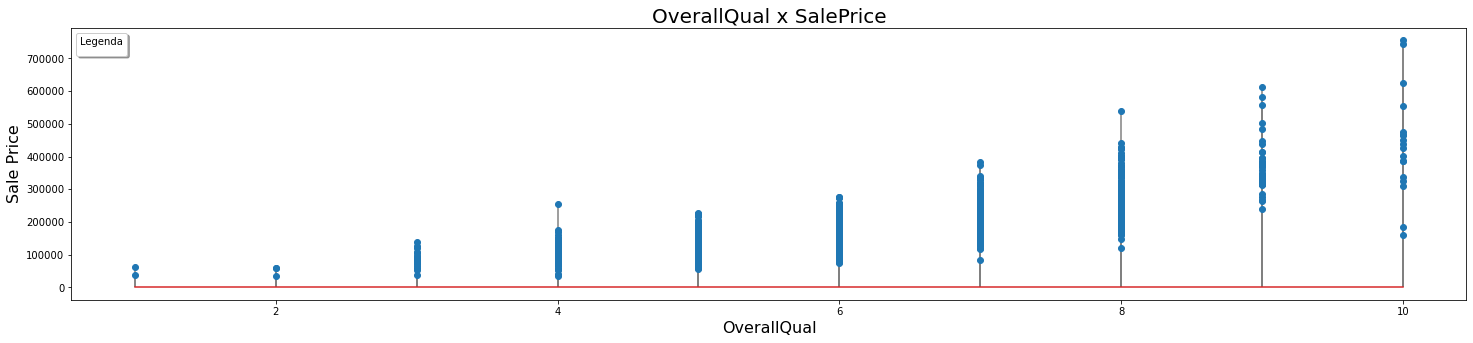

No handles with labels found to put in legend.


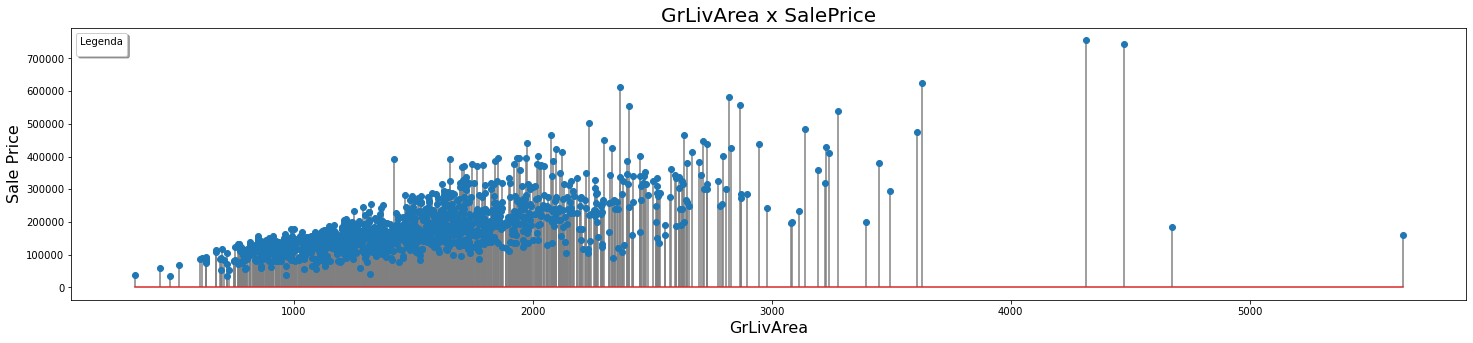

No handles with labels found to put in legend.


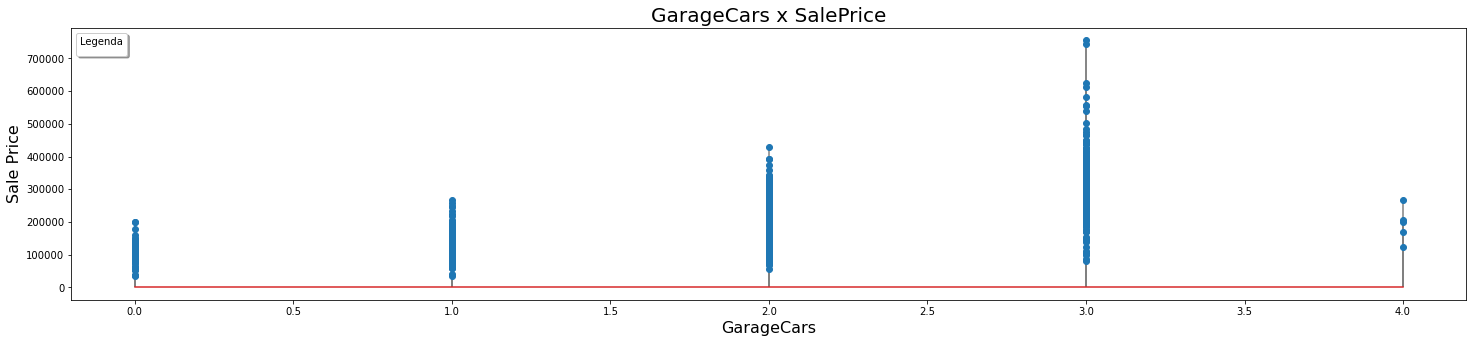

No handles with labels found to put in legend.


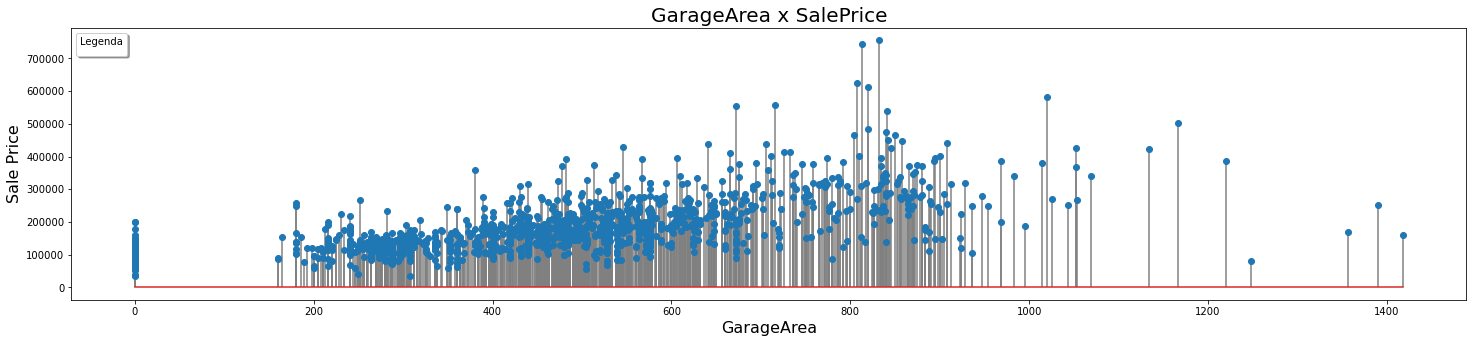

No handles with labels found to put in legend.


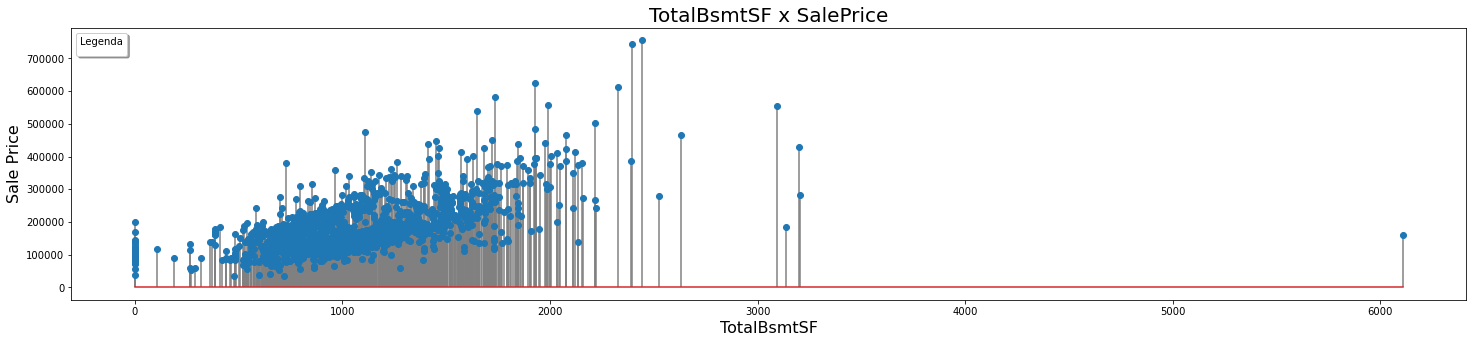

No handles with labels found to put in legend.


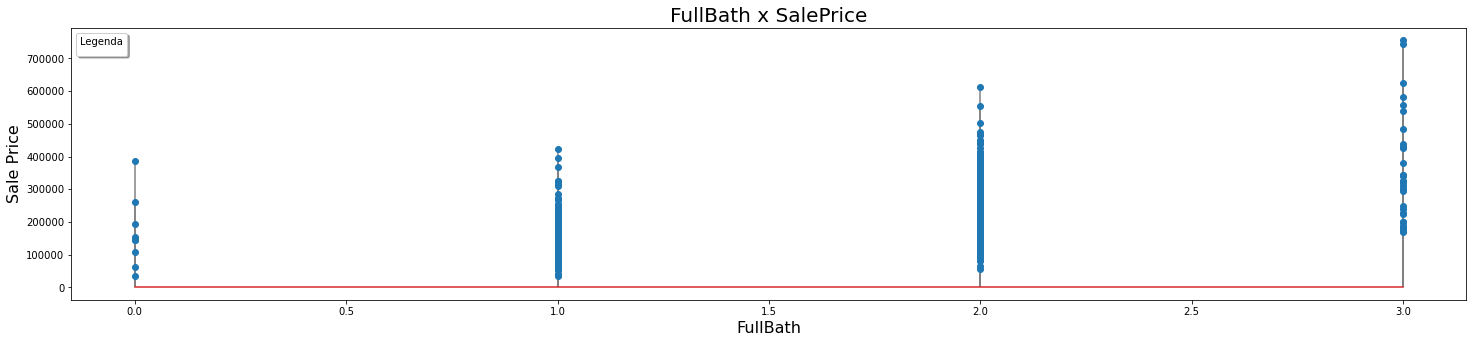

No handles with labels found to put in legend.


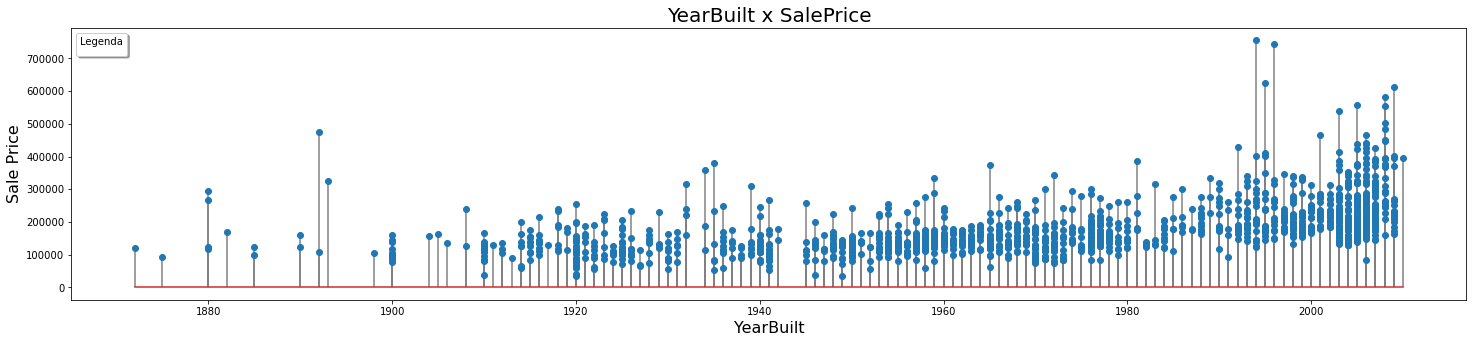

No handles with labels found to put in legend.


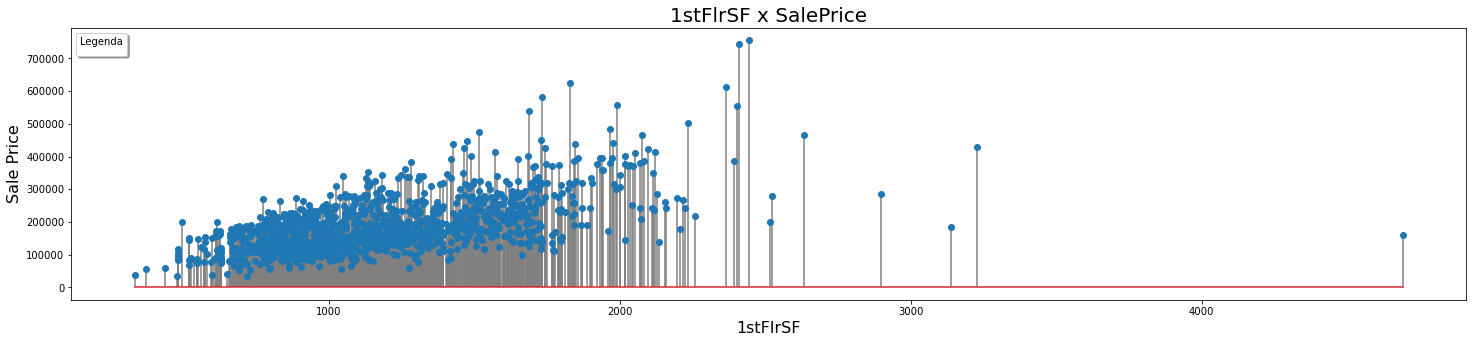

No handles with labels found to put in legend.


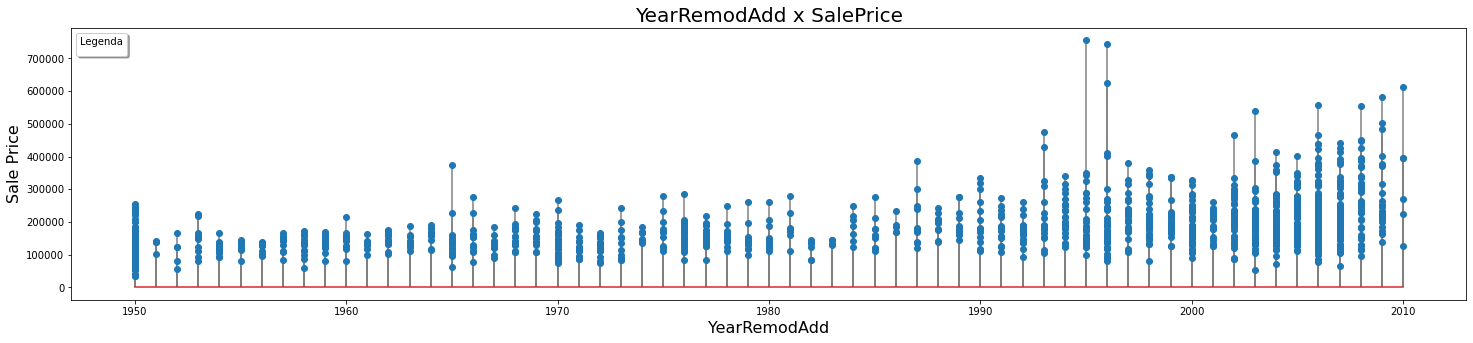

No handles with labels found to put in legend.


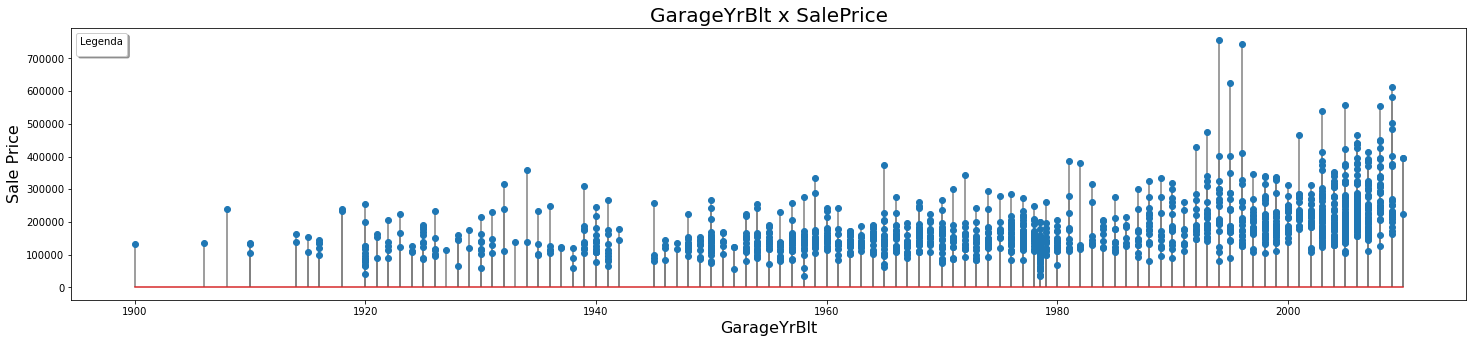

No handles with labels found to put in legend.


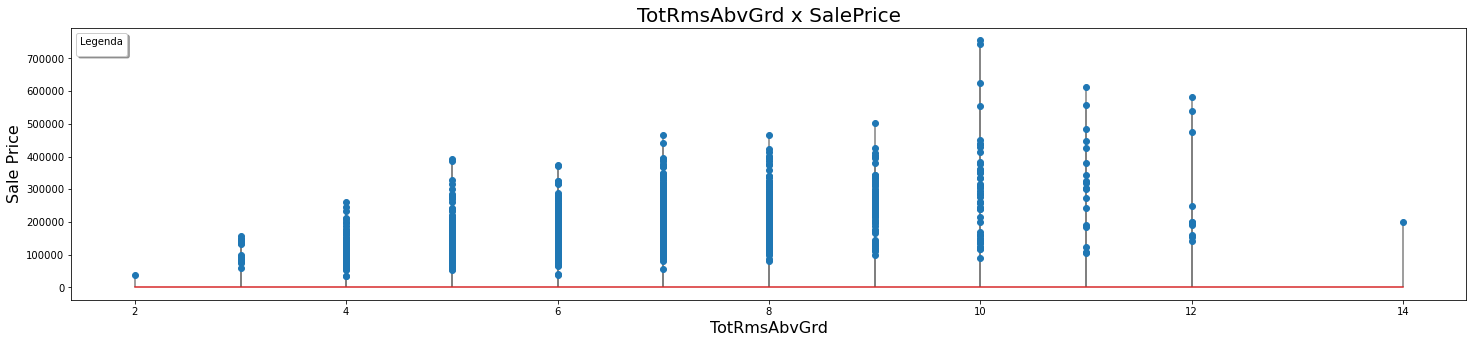

In [130]:
for x in range(len(X)):
    stemplot(X[x])
    plt.savefig(f"{x}.png")

## Descrizione Colonne Con Correlazione Maggiore
1) La colonna valuta il materiale complessivo e la finitura della casa
2) La colonna mostra la superficie abitabile sopraelevata(terra) mq 
3) La colonna mostra la dimensioni del garage in capienza auto
4) La colonna mostra la dimensioni del garage in mq
5) La colonna mostra la dimensioni totale del seminterrato in mq
6) La colonna mostra i bagni completi al piano superiore
7) La colonna mostra l'anno di costruzione 
8) La colonna mostra il primo piano in mq 
9) La colonna mostra la data di ristrutturazione (uguale alla data di costruzione se nessuna ristrutturazione o aggiunta)
10) La colonna mostra l'anno in cui è stato costruito il garage 
11) La colonna mostra il totale delle camere al piano superiore (non include i bagni)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# non_categorical_columns = categorical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

for c in categorical_columns:
    df[[c]] = oe.fit_transform(df[[c]])

df

In [ ]:
correlation = df.corr()
correlation

FEATURES CON CORRELAZIONE MAGGIORE CON "SALE PRICE"

In [ ]:
# corr_list = correlation.abs().unstack().sort_values(ascending=False).drop_duplicates()
# corr_list = corr_list[corr_list > .5]
# correlation_price[correlation_price > .5]
correlation_level = .5
correlation_price = correlation["SalePrice"].abs().sort_values(ascending=False)
correlation_columns = correlation_price[correlation_price > correlation_level].index[1:]
correlation_columns

## DECISION TREE

In [ ]:
from matplotlib.colors import ListedColormap
from scipy.spatial import distance
from sklearn import datasets, tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [29]:
X = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt',
       'TotRmsAbvGrd']
y = ["SalePrice"]

In [ ]:
# model = tree.DecisionTreeRegressor()
# param_grid = {'max_depth' : [None] + [x for x in range(2,20,2)], 'min_samples_split' : [None] + [x for x in range(2,20,2)],
#               'min_samples_leaf' : [None] + [x for x in range(2,20,2)]}
# grid_search = GridSearchCV(model, param_grid, verbose=1, cv=5)
# grid_search.fit(df[X], df[y])

# grid_search.best_params_
# # {'max_depth': 8}
# # {'min_samples_split': 16}
# # {'min_samples_leaf': 6}
best_params = {'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 6}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
model = tree.DecisionTreeRegressor(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.33, random_state=42)


In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print("pred_train: \n", pred_train)

In [ ]:
print("pred_test: \n", pred_test)

In [ ]:
mean_absolute_error(y_train, pred_train)

In [ ]:
mean_absolute_error(y_test,pred_test)

In [ ]:
y_test['SalePrice'], pred_test[0]

## XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt',
       'TotRmsAbvGrd']
y = ["SalePrice"]

In [ ]:
# model = XGBRegressor()
# param_grid = {'min_samples_leaf' : [None] + [x for x in range(2,20)]}
# grid_search = GridSearchCV(model, param_grid, verbose=1, cv=5)
# grid_search.fit(df[X], df[y])

# grid_search.best_params_
# # {'max_depth': 2}
# # {'min_samples_split': None}
# # {'min_samples_leaf': None}
best_params = {'max_depth': 2, 'min_samples_split': None, 'min_samples_leaf': None}

In [ ]:
model = XGBRegressor(n_estimators=100, **best_params)
Xtrain, Xtest, ytrain, ytest = train_test_split(df[X], df[y], random_state=42)

In [ ]:
model.fit(Xtrain, ytrain)

In [ ]:
ypred_train = model.predict(Xtrain)
ypred_test = model.predict(Xtest)
print("pred_train: \n", pred_train)

In [ ]:
print("pred_test: \n", pred_test)

In [ ]:
mean_absolute_error(ytrain, ypred_train)

In [ ]:
mean_absolute_error(ytest,ypred_test)